# Q. 1 50-Startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [2]:
data = pd.read_csv("50_startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data_new = data.drop("State",axis=1)
data_new.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Feature Scaling

In [6]:
data1 = data_new.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKS'}, axis=1)
data1.head()

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
data1.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

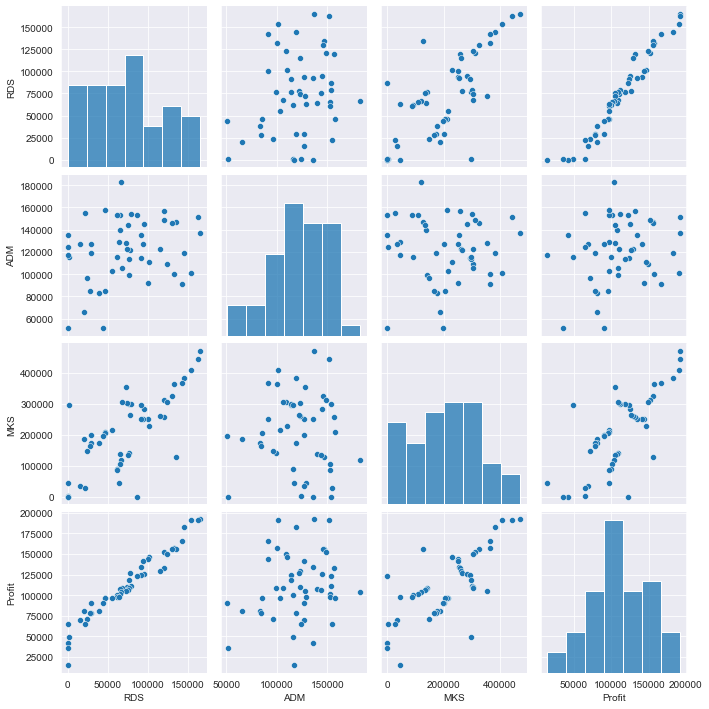

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)


# Model Building

In [9]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+ADM+MKS',data=data1).fit()
model


# Model Testing

In [10]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MKS           1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MKS          1.047168e-01
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        12:03:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Since the p value for Administration and Marketing Spend is > 0.05 
# So build simple linear regression and multi linear regression models  to see insignificant variables.


# Simple Linear Regression

In [15]:
ml_ADM=smf.ols('Profit~ADM',data = data1).fit()  
#t and p-Values
print(ml_ADM.tvalues, '\n', ml_ADM.pvalues)  

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [16]:
ml_MKS=smf.ols('Profit~MKS',data = data1).fit()  
#t and p-Values
print(ml_MKS.tvalues, '\n', ml_MKS.pvalues)

Intercept    7.808356
MKS          7.802657
dtype: float64 
 Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64


# Multiple Linear Regression 

In [17]:
ml_ADM_MKS=smf.ols('Profit~ADM+MKS',data = data1).fit()  
#t and p-Values
print(ml_ADM_MKS.tvalues, '\n', ml_ADM_MKS.pvalues)

Intercept    1.142741
ADM          2.467779
MKS          8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKS          9.727245e-11
dtype: float64


# Calculating VIF

In [18]:
rsq_rds = smf.ols('RDS~ADM+MKS',data=data1).fit().rsquared  
vif_rds = 1/(1-rsq_rds) 
vif_rds

2.4689030699947017

In [19]:
rsq_adm = smf.ols('ADM~RDS+MKS',data=data1).fit().rsquared
vif_adm = 1/(1-rsq_adm)
vif_adm

1.1750910070550453

In [20]:
rsq_mks = smf.ols('MKS~RDS+ADM',data=data1).fit().rsquared
vif_mks = 1/(1-rsq_mks)
vif_mks

2.3267732905308773

In [21]:
# Storing vif values in a data frame
d1 = pd.DataFrame({'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]})
d1

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


# Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

# Residual Analysis
Test for Normality of Residuals (Q-Q plot)

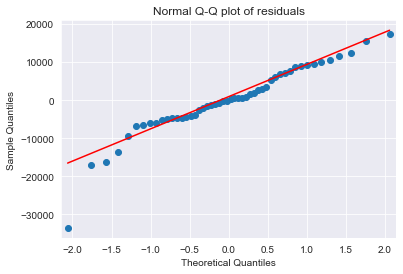

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [24]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

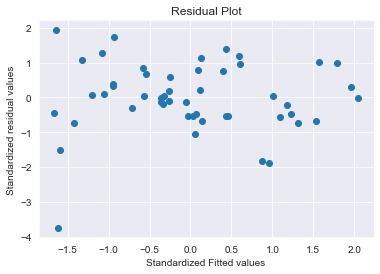

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


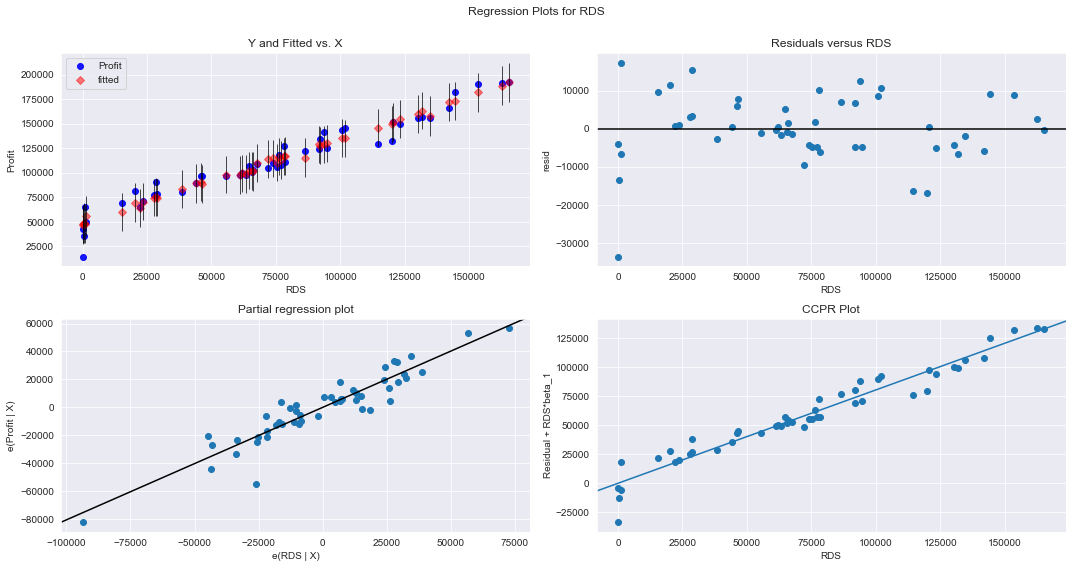

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


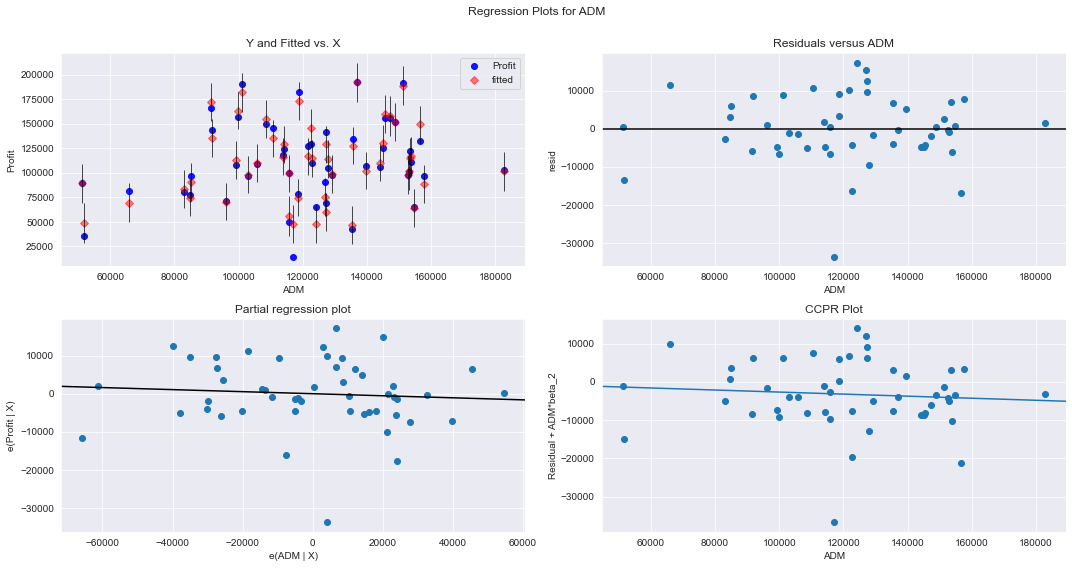

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

eval_env: 1


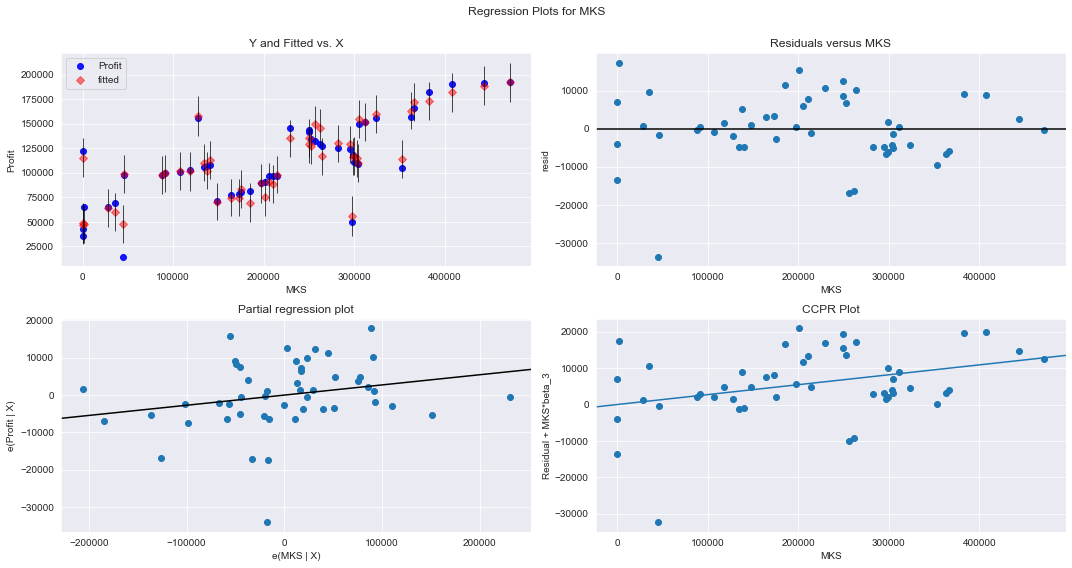

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook's Distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

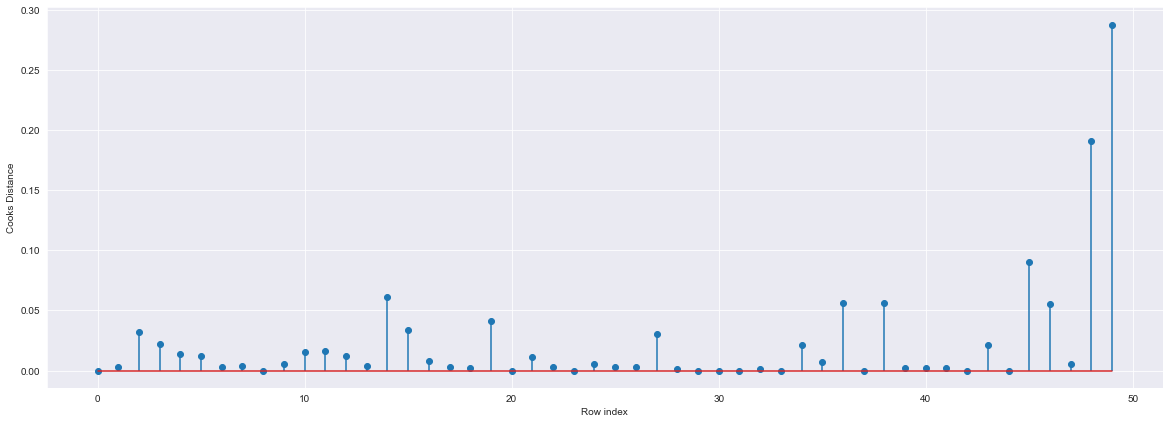

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

# High Influence Points

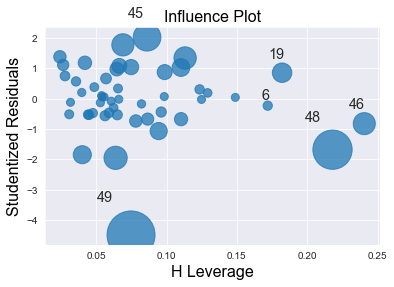

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

# From the above plot, it is evident that data point 49 are the influencers

In [35]:
data1[data1.index.isin([49])]

,RDS,ADM,MKS,Profit
49,0.0,116983.8,45173.06,14681.4


In [36]:
data1.shape

(50, 4)

# Improving the model

In [37]:
#Discard the data points which are influencers and reasign the row number
data_1 = data1.drop(data1.index[[49]],axis=0).reset_index()

In [38]:
data_1 = data_1.drop(['index'],axis=1)

In [39]:
data_1.head()

,RDS,ADM,MKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [40]:
data_1.shape

(49, 4)

# Build Model

In [41]:
#Exclude variable "ADM" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RDS+MKS',data = data_1).fit()

In [42]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9610856807456628, 1018.8564801588341)

In [43]:
#Exclude variable "MKS" and generate R-Squared and AIC values
final_ml_W= smf.ols('Profit~RDS+ADM',data = data_1).fit()

In [44]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.9584519070123048, 1022.0654576388338)

# 
Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'MKS' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [45]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

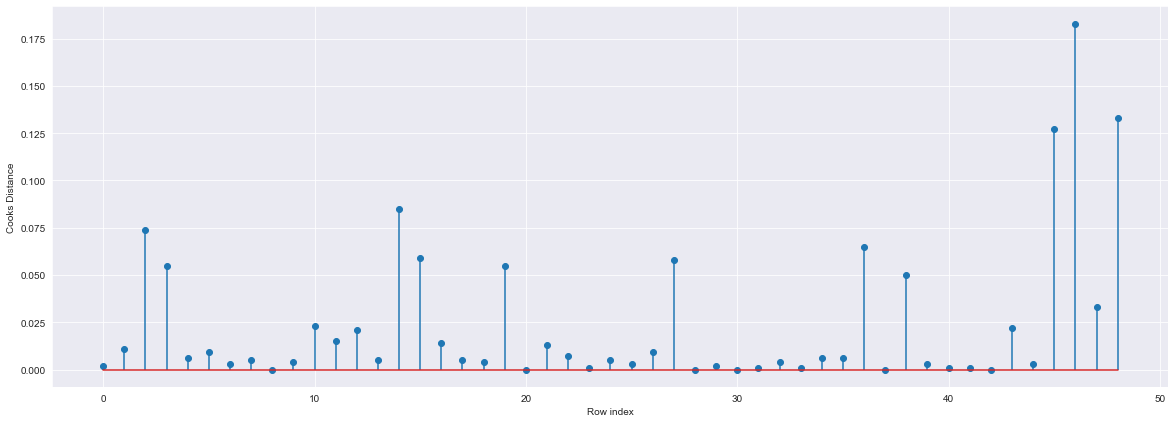

In [46]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [47]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(46, 0.18337556491338766)


# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [48]:
#New data for prediction
new_data=pd.DataFrame({'RDS':80000,'ADM':134564.55,"MKS":278839.44},index=[1])
new_data

,RDS,ADM,MKS
1,80000,134564.55,278839.44


In [49]:
Final_Model = smf.ols('Profit~RDS+ADM+MKS',data=data_1).fit()

In [50]:
Final_Model.predict(new_data)

1    119071.201909
dtype: float64

In [51]:
pred_y = Final_Model.predict(data_1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64